In [104]:
import numpy as np
import logging 
import matplotlib.pyplot as plt 
import copy

In [105]:
# logging.config()

In [106]:
def ReLU(x,leaky=False,negative_slope=None): # leaky is a flag for leaky relu, negative slope for leaky relu. 
    if leaky and negative_slope!=None:
        try:
            if negative_slope>0:
                raise ValueError("Negative slope accepts integers only.")            
            return np.where(x<0,x*negative_slope,x)
        
        except ValueError as ve:
            print(f"an unexpected error{ve}")
            
        except Exception as e:            
            print(f"An unexpected error {e}")
            raise 
    return np.maximum(0,x)


In [107]:
def gradient_ReLU(x):
    return np.where(x>0,1,0)

In [108]:
def normal_initialization(fraction,weight_size):
    fract=np.sqrt(2/fraction)
    return np.random.normal(0,fract,size=weight_size)

In [109]:
def uniform_initialization(fraction,weight_size):
    fract= np.sqrt(6/fraction)
    return np.random.uniform(-fract,fract,size=weight_size)


In [110]:
method_map={
        "uniform":uniform_initialization,
        "normal":normal_initialization
    }

In [111]:
def initialize_layer(layer_in,layer_out,activation="linear",mode="he",method="uniform",bias=True):
    """ Returns weights and biases initialized as response to input information

    Args:
        layer_in (_type_): _description_
        layer_out (_type_): _description_
        mode (str, optional): _description_. Defaults to "he".
        method (str, optional): _description_. Defaults to "uniform".

    Raises:
        ValueError: _description_
    """
    
    
    
    weights=np.zeros((layer_in,layer_out))
    if bias:
        biases=np.zeros((1,layer_out))
    
    
    try:        
        calcluation=0
        
        if mode.lower()=='random': return np.random.random(size=(layer_in,layer_out))
        
        elif mode.lower()=="he":
            calcluation=1/(np.sqrt(layer_in+layer_out))
            
        elif mode.lower()=="xavier":
            calcluation=1/(np.sqrt(layer_in))
            
        else:
            raise ValueError("Only accepts 'random','he' and 'xavier' string as arguments.")

        weights=method_map[method](calcluation,(layer_in,layer_out))
        
        
       
    except Exception as e:
        print(f"Error occured: {e}")    

    
    return {"weight":weights,"bias":biases,"activation":activation}
    

In [112]:
layer_number=(2,3)
val=initialize_layer(2,3,method="uniform")
val['weight']


array([[ 1.9610857 ,  3.63825125,  0.95183807],
       [ 3.24158662, -1.26667203, -1.63010671]])

In [113]:
custom_hidden_layers=[
    (8,"relu"),
    (4,"relu"),
    (2,"relu"),
    (1,"linear")
    ]
custom_X=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]]) # 5 x 3 
custom_Y=np.array([1,2,3,4,5])


In [114]:
def build_network(hidden_layers,X):
    neural_network={}
    new_hidden=hidden_layers.copy()
    new_hidden.insert(0,(X.shape[1],"relu"))
    
    for layer in range(len(hidden_layers)):
        neural_network[f"Layer{layer}"]=initialize_layer(new_hidden[layer][0],new_hidden[layer+1][0],activation=new_hidden[layer+1][1])
    return neural_network
    

In [115]:
network=build_network(hidden_layers=custom_hidden_layers,X=custom_X)
network

{'Layer0': {'weight': array([[-0.28301249, -4.41897502, -4.07637604, -1.56614799,  3.90881129,
           1.32459517,  1.4751835 ,  2.78496892],
         [-0.80874154, -2.48640562, -1.51196427,  2.51941367, -3.18574187,
           0.35968423, -3.14922467, -2.17375396],
         [ 1.31229971,  2.11784169,  0.77155736, -1.20751428, -0.36232026,
          -2.69946747, -0.44760138,  2.93207873]]),
  'bias': array([[0., 0., 0., 0., 0., 0., 0., 0.]]),
  'activation': 'relu'},
 'Layer1': {'weight': array([[-2.13866136, -3.47596709,  2.29966773,  1.50397889],
         [ 3.41846141, -2.55620834, -3.07522034, -3.5927446 ],
         [ 1.08232791,  2.03042847, -4.05756259, -1.7011879 ],
         [ 3.81587977, -2.9286273 , -3.12681591, -1.70002667],
         [ 1.22685979,  2.2922615 ,  4.10774862,  4.09855625],
         [-1.58083979,  0.63708123, -4.23330254,  2.92331875],
         [ 4.05567524, -4.42457777,  2.42499226,  4.0244854 ],
         [ 0.76627297,  2.31375502, -3.8895404 ,  1.65388531]]),

In [116]:
network['Layer0']

{'weight': array([[-0.28301249, -4.41897502, -4.07637604, -1.56614799,  3.90881129,
          1.32459517,  1.4751835 ,  2.78496892],
        [-0.80874154, -2.48640562, -1.51196427,  2.51941367, -3.18574187,
          0.35968423, -3.14922467, -2.17375396],
        [ 1.31229971,  2.11784169,  0.77155736, -1.20751428, -0.36232026,
         -2.69946747, -0.44760138,  2.93207873]]),
 'bias': array([[0., 0., 0., 0., 0., 0., 0., 0.]]),
 'activation': 'relu'}

In [117]:
def forward_pass(input_network,X):
    
    
    network=input_network.copy()
    network_values={}
    
    result=X @ network['Layer0']["weight"] + network['Layer0']["bias"]
    
    network_values['Layer0']=[result]
    
    if network['Layer0']['activation']:
        result=ReLU(result)
        
    network_values['Layer0'].append(result)
    
    network.pop('Layer0')
    
    count=1
    for layer_name in network:
        
        params = network[layer_name]
        W = params["weight"]
        b = params["bias"]
        result=result @ W +b
        network_values[layer_name]=[result]
        count+=1
        
        if params["activation"].lower()=="relu":
            result=ReLU(result)
            
        network_values[layer_name].append(result)
        
        print(f"Result in layer {layer_name} : {result}")
    print(f"Total calculations: {count}")    
    return network_values 

In [118]:
forward_result=forward_pass(network,X=custom_X)
forward_result

Result in layer Layer1 : [[  1.18780907   9.6585315    0.          15.02641353]
 [  7.91818208  31.95364372   0.          33.60210589]
 [ 14.64855509  54.24875593   0.          52.17779825]
 [ 21.37892811  76.54386814   0.          70.75349062]
 [ 29.06546257 100.62546979   0.          92.52342039]]
Result in layer Layer2 : [[0.         2.46836521]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
Result in layer Layer3 : [[1.58794266]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Total calculations: 4


{'Layer0': [array([[  2.03640355,  -3.03826119,  -4.78563249,  -0.14986349,
           -3.54963322,  -6.0544388 ,  -6.16606999,   7.23369721],
         [  2.69804059, -17.40087804, -19.23598133,  -0.91260929,
           -2.46738573,  -9.10000302, -12.53099765,  17.86357831],
         [  3.35967762, -31.7634949 , -33.68633016,  -1.6753551 ,
           -1.38513825, -12.14556725, -18.89592531,  28.49345941],
         [  4.02131465, -46.12611175, -48.136679  ,  -2.4381009 ,
           -0.30289076, -15.19113147, -25.26085297,  39.12334051],
         [  4.68295169, -60.4887286 , -62.58702784,  -3.20084671,
            0.77935673, -18.2366957 , -31.62578064,  49.75322161]]),
  array([[ 2.03640355,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  7.23369721],
         [ 2.69804059,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        , 17.86357831],
         [ 3.35967762,  0.        ,  0.        ,  0.        ,  0.        

In [119]:
def loss_function(y_true,y_pred,type='mse'):
    y_true=y_true.reshape(-1,1)
    y_pred=y_pred.reshape(-1,1)
    # print(y_true.shape,y_pred.shape)
    loss=np.sum((y_true-y_pred)**2)
    return loss/2

In [120]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [121]:
def derive_ReLU(activation):
    return np.where(activation>0,1,0)


In [122]:
def derive_linear(activation):
    return activation


In [123]:
def derive_sigmoid(activation):
    return activation * (1-activation)

In [124]:
def gradient_calculation(network,X,y,result):
    """
    Docstring for gradient_calculation
    
    :param network: Network structure of our NN, needed for updating network parameter
    :param X: For Forward pass
    :param y: For calculating loss of prediction
    :param result: Contains Activation and Linear combination values for all layers in forward pass
    """
    activations=[activations for (Z,activations) in result.values()]
    
    # reshape for no matrix errors
    output=activations[-1].reshape(-1,1) # final value of activations is being used as output
    y=y.reshape(-1,1)
    
    Z=[Z for (Z,activations) in result.values()]
    
    # Z, activations = map(list, zip(*result.values())), for doing above execution in a single step

    #dL/dZ of previous layers stored, this will be backpropagated through all layers
    # multiply by weights for getting gradients for weights, these will be default updates for biases
    linear_error_diff=[] 
    
    loss_value=loss_function(y,output) # considering MSE
    print(f"Current loss: {loss_value}")
    
    if network[f'Layer{len(network)-1}']['activation'].lower()=="relu":
        activation_grad=gradient_ReLU(activations[-1])
    else: # currently only considering linear and relu, if not relu then linear which is the same 
        activation_grad=1
        
    output_loss_diff= output - y # y_pred - y_true , MSE differential for final linear layer
    
    loss_by_Z=output_loss_diff * activation_grad
    linear_error_diff.append(loss_by_Z)
    
   
    
    
    for i in range(1,len(network)):
        
        current_layer_activation=network[f'Layer{len(network)-i}']['activation'].lower()
        if current_layer_activation=='relu':
            activation_grad=gradient_ReLU(activations[-(i+1)]) #current layer activation grad
        
        forward_layer_error=linear_error_diff[0] # dl/dz for forward layer
        forward_layer_weight=network[f"Layer{len(network)-i}"]["weight"].T # Transposed the weights of forward layer
        
        # print("fle",forward_layer_error.shape)
        # print("flw",forward_layer_weight.shape)
        # print("flw",activation_grad)
        
        error_Z_by_layer= forward_layer_error @ forward_layer_weight * activation_grad
        
        #dL/dZ for current layer= dl/dZ of forward layer x weights of forward layer x relu grad/ grad of current layer activation
        # for dL/dW of this layer, multiiply this by weights of this layer,
        # fo dl/lB of this layer, multiply this by bias of this layer
        # for backprop, element wise multiplication with activations, matrix multiplications with weights 
        linear_error_diff=[error_Z_by_layer] + linear_error_diff
        
    return linear_error_diff
    
    
    

In [125]:
grads=gradient_calculation(network=network,X=custom_X,y=custom_Y,result=forward_result)

Current loss: 27.172838286921703


In [126]:
forward_result

{'Layer0': [array([[  2.03640355,  -3.03826119,  -4.78563249,  -0.14986349,
           -3.54963322,  -6.0544388 ,  -6.16606999,   7.23369721],
         [  2.69804059, -17.40087804, -19.23598133,  -0.91260929,
           -2.46738573,  -9.10000302, -12.53099765,  17.86357831],
         [  3.35967762, -31.7634949 , -33.68633016,  -1.6753551 ,
           -1.38513825, -12.14556725, -18.89592531,  28.49345941],
         [  4.02131465, -46.12611175, -48.136679  ,  -2.4381009 ,
           -0.30289076, -15.19113147, -25.26085297,  39.12334051],
         [  4.68295169, -60.4887286 , -62.58702784,  -3.20084671,
            0.77935673, -18.2366957 , -31.62578064,  49.75322161]]),
  array([[ 2.03640355,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  7.23369721],
         [ 2.69804059,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        , 17.86357831],
         [ 3.35967762,  0.        ,  0.        ,  0.        ,  0.        

In [127]:
def update_params(network, grads, results, learning_rate,X,batch_size):
    
    if batch_size is None:
        batch_size=len(X)
    
    activations=[activations for (Z,activations) in results.values()]
    activations.insert(0,X)
    layer_number=0
    for error in grads:
        weight=network[f"Layer{layer_number}"]["weight"]
        bias=network[f"Layer{layer_number}"]["bias"]
        activation_previous=activations[layer_number]
        
        delta_weight=activation_previous.T @ error
        delta_bias = np.sum(error, axis=0, keepdims=True)
        
        weight -= learning_rate * delta_weight
        bias   -= learning_rate * delta_bias
        
        network[f"Layer{layer_number}"]["weight"]=weight
        network[f"Layer{layer_number}"]["bias"]=bias

        
         
        layer_number+=1
    return network
        

In [128]:
print(grads)

[array([[  4.54926703,  -0.        ,  -0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.07057165],
       [-15.47520642,   0.        ,   0.        ,  -0.        ,
         -0.        ,  -0.        ,  -0.        ,   3.6417553 ],
       [-23.21280964,   0.        ,   0.        ,  -0.        ,
         -0.        ,  -0.        ,  -0.        ,   5.46263296],
       [-30.95041285,   0.        ,   0.        ,  -0.        ,
         -0.        ,  -0.        ,  -0.        ,   7.28351061],
       [-38.68801606,   0.        ,   0.        ,  -0.        ,
         -5.71056086,  -0.        ,  -0.        ,   9.10438826]]), array([[-0.07591519, -0.95117234,  0.        ,  0.71853827],
       [ 0.25824013,  3.23559558, -0.        , -2.44424606],
       [ 0.3873602 ,  4.85339337, -0.        , -3.66636908],
       [ 0.51648026,  6.47119117, -0.        , -4.88849211],
       [ 0.64560033,  8.08898896, -0.        , -6.11061514]]), array([[-0.17638895,  0.37823383],
       [ 0

In [129]:
update_params(network=network,X=custom_X,grads=grads,results=forward_result,learning_rate=0.01,batch_size=None)

{'Layer0': {'weight': array([[10.03988314, -4.41897502, -4.07637604, -1.56614799,  4.6511842 ,
           1.32459517,  1.4751835 ,  0.35569859],
         [10.55192587, -2.48640562, -1.51196427,  2.51941367, -2.38626335,
           0.35968423, -3.14922467, -4.84724145],
         [13.7107389 ,  2.11784169,  0.77155736, -1.20751428,  0.49426387,
          -2.69946747, -0.44760138,  0.01437409]]),
  'bias': array([[ 1.03777178,  0.        ,  0.        ,  0.        ,  0.05710561,
           0.        ,  0.        , -0.24421715]]),
  'activation': 'relu'},
 'Layer1': {'weight': array([[-2.20809934, -4.34598384,  2.29966773,  2.16121029],
         [ 3.41846141, -2.55620834, -3.07522034, -3.5927446 ],
         [ 1.08232791,  2.03042847, -4.05756259, -1.7011879 ],
         [ 3.81587977, -2.9286273 , -3.12681591, -1.70002667],
         [ 1.22182827,  2.22921942,  4.10774862,  4.14617974],
         [-1.58083979,  0.63708123, -4.23330254,  2.92331875],
         [ 4.05567524, -4.42457777,  2.424992

In [130]:
def train(
    network,
    X,
    y,
    epochs=200,
    learning_rate=0.01,
    batch_size=None,
    verbose=True
):
    loss_history = []

    for epoch in range(epochs):
        # Forward pass
        forward_result = forward_pass(network, X)

        # Loss (for tracking only)
        output = list(forward_result.values())[-1][1]
        loss = loss_function(y, output)
        loss_history.append(loss)

        # Backward pass
        grads = gradient_calculation(
            network=network,
            X=X,
            y=y,
            result=forward_result
        )

        # Parameter update
        network = update_params(
            network=network,
            grads=grads,
            results=forward_result,
            learning_rate=learning_rate,
            X=X,
            batch_size=batch_size
        )

        if verbose and epoch % 20 == 0:
            print(f"Epoch {epoch:4d} | Loss: {loss:.6f}")

    return network, loss_history


In [131]:
trained_network, loss_history = train(
    network=network,
    X=custom_X,
    y=custom_Y,
    epochs=300,
    learning_rate=0.001,
    batch_size=None,
    verbose=True
)


Result in layer Layer1 : [[   0.            0.          174.42427009  164.49186777]
 [   0.            0.          445.07976941  421.21715338]
 [   0.            0.          715.73526874  677.94243899]
 [   0.            0.          986.39076807  934.66772461]
 [   0.            0.         1257.0462674  1191.39301022]]
Result in layer Layer2 : [[    0.          1850.74692908]
 [    0.          4735.2358334 ]
 [    0.          7619.72473771]
 [    0.         10504.21364202]
 [    0.         13388.70254633]]
Result in layer Layer3 : [[1163.89300571]
 [2977.67399257]
 [4791.45497942]
 [6605.23596628]
 [8419.01695314]]
Total calculations: 4
Current loss: 73754127.25652878
Epoch    0 | Loss: 73754127.256529
Result in layer Layer1 : [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Result in layer Layer2 : [[7.1426952 0.       ]
 [7.1426952 0.       ]
 [7.1426952 0.       ]
 [7.1426952 0.       ]
 [7.1426952 0.       ]]
Result in layer Layer3 : [[-25.95103756]
 [-25

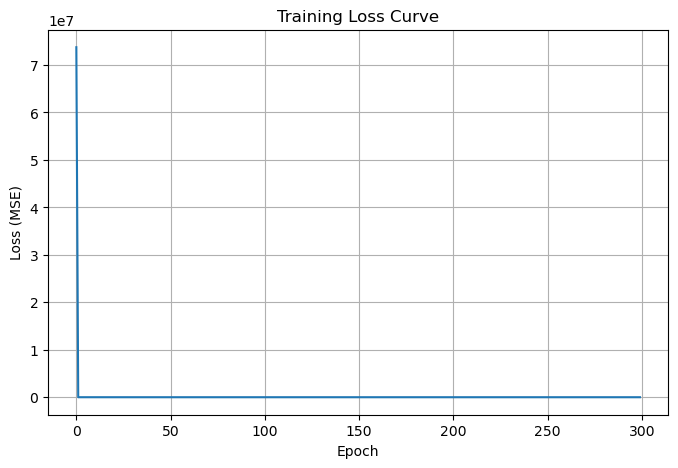

In [132]:
plt.figure(figsize=(8, 5))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


In [133]:
# Before training
forward_before = forward_pass(build_network(custom_hidden_layers, custom_X), custom_X)
loss_before = loss_function(custom_Y, list(forward_before.values())[-1][1])

# After training
forward_after = forward_pass(trained_network, custom_X)
loss_after = loss_function(custom_Y, list(forward_after.values())[-1][1])

print("Loss before training:", loss_before)
print("Loss after training :", loss_after)


Result in layer Layer1 : [[  0.          31.80014364   0.          32.78553063]
 [  0.          84.57957986   0.          59.52057573]
 [  0.         138.35821362   0.          88.09969498]
 [  0.         192.13684739   0.         116.67881423]
 [  0.         245.91548115   0.         145.25793347]]
Result in layer Layer2 : [[110.24697981   0.        ]
 [277.93610767   0.        ]
 [449.53893007   0.        ]
 [621.14175248   0.        ]
 [792.74457488   0.        ]]
Result in layer Layer3 : [[ 235.08606611]
 [ 592.65937528]
 [ 958.57808363]
 [1324.49679198]
 [1690.41550034]]
Total calculations: 4
Result in layer Layer1 : [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Result in layer Layer2 : [[7.75687886 0.        ]
 [7.75687886 0.        ]
 [7.75687886 0.        ]
 [7.75687886 0.        ]
 [7.75687886 0.        ]]
Result in layer Layer3 : [[3.]
 [3.]
 [3.]
 [3.]
 [3.]]
Total calculations: 4
Loss before training: 2950570.7221364705
Loss after training : 5.

In [134]:
def predict(network, X):
    """
    Inference only (forward pass)
    """
    result = forward_pass(network, X)
    output = list(result.values())[-1][1]  # final activations
    return output


In [135]:
y_pred = predict(trained_network, custom_X)

print("Predictions:")
print(y_pred.reshape(-1))

print("Ground truth:")
print(custom_Y)


Result in layer Layer1 : [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Result in layer Layer2 : [[7.75687886 0.        ]
 [7.75687886 0.        ]
 [7.75687886 0.        ]
 [7.75687886 0.        ]
 [7.75687886 0.        ]]
Result in layer Layer3 : [[3.]
 [3.]
 [3.]
 [3.]
 [3.]]
Total calculations: 4
Predictions:
[3. 3. 3. 3. 3.]
Ground truth:
[1 2 3 4 5]


In [136]:
x_new = np.array([[2, 4, 6]])  # shape (1, 3)
y_new_pred = predict(trained_network, x_new)

print("Predicted value:", y_new_pred.item())


Result in layer Layer1 : [[0. 0. 0. 0.]]
Result in layer Layer2 : [[7.75687886 0.        ]]
Result in layer Layer3 : [[3.]]
Total calculations: 4
Predicted value: 2.9999999999999964
